# Assignment 3
### Due October 8, 2024, 11:59 PM 

# **Numeric/Numeric Bivariate Analysis**

In [3]:
import pandas as pd

df = pd.read_csv('https://www.dropbox.com/s/1m9g4uxsd6m6abv/ToyotaCorolla.csv?dl=1')
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


# **Problem 1: Calculate the correlation of each numeric variable and Price**

- Create a DataFrame that calculates the Pearson Correlation (r) for each numeric variable against the label (Price). Also show the p-value for the correlation.

Use this to answer the following questions on Learning Suite:

**Q1. What numeric variable has the strongest correlation to Price?**

**Q2. Which numeric variable does NOT have a statistically significant relationship with Price?**

**Q3. What type of relationship does KM have with Price?**


*   Strong Positive
*   Weak Positive
*   Strong Negative
*   Weak Negative


In [16]:
priceCorr = df.select_dtypes(include= 'number').corrwith(df["Price"])
priceCorr

Price        1.000000
Age         -0.876590
KM          -0.569960
HP           0.314990
MetColor     0.108905
Automatic    0.033081
CC           0.165067
Doors        0.185326
Weight       0.581198
dtype: float64

# **Problem 2: Scatter Plot - Weight**

- Create a scatter plot with a linear regression line with Weight as the independent (x) variable and Price as the dependent (y) variable.  

- Print the linear regression equation, r value, p-value, and r-square value. Round all the numbers to 3 decimal places.

Then answer the following questions on Learning Suite:

**Q4. What percent of the variance in Price can be explained by the car's weight?**

**Q5. How much does the price increase for every kilogram increase in weight?**

**Q6. Is the correlation value (r value) between weight and price statistically significant?**


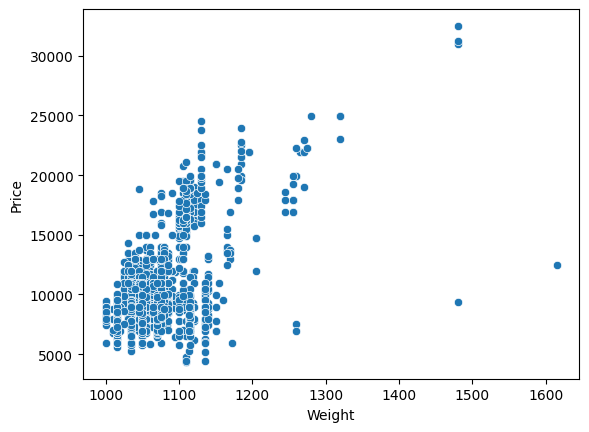

y = 40.044x -32215.197
r: 0.581
p-value:0.0
r^2: 0.338


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


sns.scatterplot(x = df.Weight, y = df.Price)
plt.show()

m, b = np.polyfit(df.Weight, df.Price, 1)
print('y = ' + str(round(m, 3)) + 'x ' + str(round(b, 3)))

r, p = stats.pearsonr(df.Weight, df.Price)
print('r: ' + str(round(r, 3)))
print('p-value:' + str(round(p, 3)))
print('r^2: ' + str(round(r ** 2, 3)))


You may have noticed that once you write out the code to generate a scatter plot, r square value, p-value, and r value, it's possible to copy and paste that code to reuse in other problems. For instance, the code you wrote in Problem 2 to generate stats and visualizations for the relationship between Weight and Price can easily be edited to show stats and visualizations for the relationship between Doors and Price.

Instead of copying and pasting code, let's put that code in a function. Create a function called numericToNumericBiRelationship. The function should accept three parameters: the dataframe, the independent variable, and the dependent variable.

The function should do the following:

*   Print the r value between the dependent and independent variables. Round to 3 decimal places.
*   Print the associated p-value. Round to 3 decimal places.
*   Print the R Squared value for the relationship between the dependent and independent variables. Round to 3 decimal places.
*   Print out the linear regression equation between the dependent and independent variables.
*   Show a scatter plot with a linear regression line for the dependent and independent variables.

Once you generate the function, run the code below that calls the function.

**Q7. What is the y-intercept?**

**Q8. What is the r-value?**

**Q9. What is the r squared value?**


# **Problem 3: Scatter Plot - Doors**

r: 0.185
p-value:0.0
r^2: 0.034
y = 705.559x 7885.006


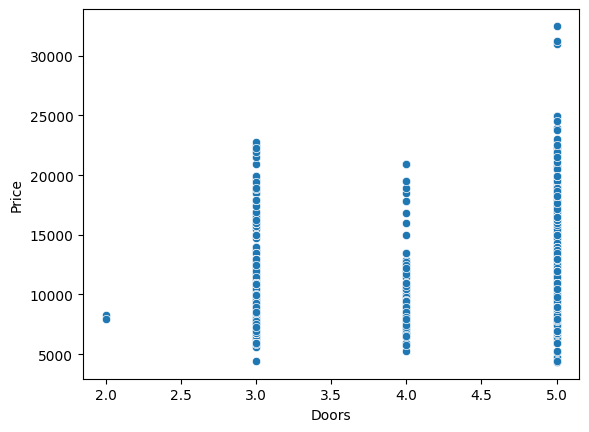

In [24]:
def numericToNumericBiRelationship(df, x, y) :
    r, p = stats.pearsonr(x, y)
    print('r: ' + str(round(r, 3)))
    print('p-value:' + str(round(p, 3)))
    print('r^2: ' + str(round(r ** 2, 3)))
    m, b = np.polyfit(x, y, 1)
    print('y = ' + str(round(m, 3)) + 'x ' + str(round(b, 3)))
    sns.scatterplot(x = x, y = y)
    plt.show()

numericToNumericBiRelationship(df,df['Doors'], df['Price'])

# **Problem 4 - Assumptions**

When we run a linear regression we assume that our data complies with certain assumptions.

- can you list the 4 primary assumptions of a linear regression?

- One of the assumptions is homoskedasticity of the data. We want to make sure that the data is not heteroskedastic. Run the appropriate tests from the code in class to evaluate heteroskedasticity of weight and price.

**Q12. Is there an issue of heteroskedasticity?**



In [27]:
# homoskedasticity, normality, independence, linearity

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Fit the OLS model
model = ols(formula='Weight~Price', data=df).fit()
white_test = het_white(model.resid, model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(3)


,LM stat,LM p-value,F-stat,F p-value
White,66.040,0.0,34.54,0.0
Breusch-Pagan,14.424,0.0,14.55,0.0
